<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data_multi_delta_(3_2)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_3.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_3.2_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,42.258078,62.879645,637.193152,752.330874,2.597216,749.733659
1,0.0,1.0,93.435147,87.968103,-909.231371,-717.828122,-644.505081,-73.323040
2,0.0,2.0,92.358208,34.140978,-393.698249,-257.199063,-365.898950,108.699887
3,0.0,3.0,65.688025,89.446206,-660.354834,-495.220603,-368.636210,-126.584393
4,0.0,4.0,79.215593,31.620962,-237.717912,-116.881357,-219.222166,102.340809
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,95.775526,54.842887,-701.183830,-540.565417,363.244142,-903.809559
29996,999.0,26.0,85.790216,66.140398,1463.791528,1625.722142,397.309798,1228.412344
29997,999.0,27.0,81.507218,31.105797,-14.249194,108.363821,279.037686,-170.673864
29998,999.0,28.0,70.461393,27.571916,174.944085,282.977394,263.304260,19.673134


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2            e            Y       y_hat  \
rep   index                                                               
0.0   0.0    42.258078  62.879645   637.193152   752.330874    2.597216   
      1.0    93.435147  87.968103  -909.231371  -717.828122 -644.505081   
      2.0    92.358208  34.140978  -393.698249  -257.199063 -365.898950   
      3.0    65.688025  89.446206  -660.354834  -495.220603 -368.636210   
      4.0    79.215593  31.620962  -237.717912  -116.881357 -219.222166   
...                ...        ...          ...          ...         ...   
999.0 25.0   95.775526  54.842887  -701.183830  -540.565417  363.244142   
      26.0   85.790216  66.140398  1463.791528  1625.722142  397.309798   
      27.0   81.507218  31.105797   -14.249194   108.363821  279.037686   
      28.0   70.461393  27.571916   174.944085   282.977394  263.304260   
      29.0   60.603707  21.916848     0.160728    92.681283  240.928695   

                   e_hat  
rep   index               
0.0   0.0     749.733659  
      1.0     -73.323040  
      2.0     108.699887  
      3.0    -126.584393  
      4.0     102.340809  
...                  ...  
999.0 25.0   -903.809559  
      26.0   1228.412344  
      27.0   -170.673864  
      28.0     19.673134  
      29.0   -148.247411  

[30000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2            e            Y       y_hat  \
rep   index                                                               
0.0   0.0    42.258078  62.879645   637.193152   752.330874    2.597216   
      1.0    93.435147  87.968103  -909.231371  -717.828122 -644.505081   
      2.0    92.358208  34.140978  -393.698249  -257.199063 -365.898950   
      3.0    65.688025  89.446206  -660.354834  -495.220603 -368.636210   
      4.0    79.215593  31.620962  -237.717912  -116.881357 -219.222166   
...                ...        ...          ...          ...         ...   
999.0 25.0   95.775526  54.842887  -701.183830  -540.565417  363.244142   
      26.0   85.790216  66.140398  1463.791528  1625.722142  397.309798   
      27.0   81.507218  31.105797   -14.249194   108.363821  279.037686   
      28.0   70.461393  27.571916   174.944085   282.977394  263.304260   
      29.0   60.603707  21.916848     0.160728    92.681283  240.928695   

                   e_hat  
rep   index               
0.0   0.0     749.733659  
      1.0     -73.323040  
      2.0     108.699887  
      3.0    -126.584393  
      4.0     102.340809  
...                  ...  
999.0 25.0   -903.809559  
      26.0   1228.412344  
      27.0   -170.673864  
      28.0     19.673134  
      29.0   -148.247411  

[30000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,42.258078,62.879645,637.193152,752.330874,2.597216,749.733659
1,0.0,1.0,93.435147,87.968103,-909.231371,-717.828122,-644.505081,-73.323040
2,0.0,2.0,92.358208,34.140978,-393.698249,-257.199063,-365.898950,108.699887
3,0.0,3.0,65.688025,89.446206,-660.354834,-495.220603,-368.636210,-126.584393
4,0.0,4.0,79.215593,31.620962,-237.717912,-116.881357,-219.222166,102.340809
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,95.775526,54.842887,-701.183830,-540.565417,363.244142,-903.809559
29996,999.0,26.0,85.790216,66.140398,1463.791528,1625.722142,397.309798,1228.412344
29997,999.0,27.0,81.507218,31.105797,-14.249194,108.363821,279.037686,-170.673864
29998,999.0,28.0,70.461393,27.571916,174.944085,282.977394,263.304260,19.673134


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2            e            Y       y_hat  \
rep   index                                                               
0.0   0.0    42.258078  62.879645   637.193152   752.330874    2.597216   
      1.0    93.435147  87.968103  -909.231371  -717.828122 -644.505081   
      2.0    92.358208  34.140978  -393.698249  -257.199063 -365.898950   
      3.0    65.688025  89.446206  -660.354834  -495.220603 -368.636210   
      4.0    79.215593  31.620962  -237.717912  -116.881357 -219.222166   
...                ...        ...          ...          ...         ...   
999.0 25.0   95.775526  54.842887  -701.183830  -540.565417  363.244142   
      26.0   85.790216  66.140398  1463.791528  1625.722142  397.309798   
      27.0   81.507218  31.105797   -14.249194   108.363821  279.037686   
      28.0   70.461393  27.571916   174.944085   282.977394  263.304260   
      29.0   60.603707  21.916848     0.160728    92.681283  240.928695   

                   e_hat  
rep   index               
0.0   0.0     749.733659  
      1.0     -73.323040  
      2.0     108.699887  
      3.0    -126.584393  
      4.0     102.340809  
...                  ...  
999.0 25.0   -903.809559  
      26.0   1228.412344  
      27.0   -170.673864  
      28.0     19.673134  
      29.0   -148.247411  

[30000 rows x 6 columns]

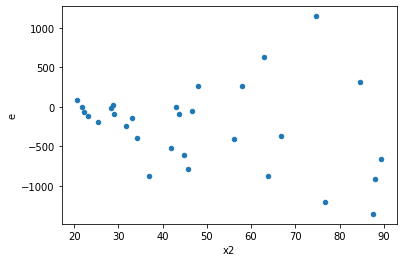

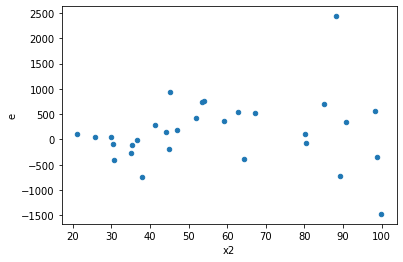

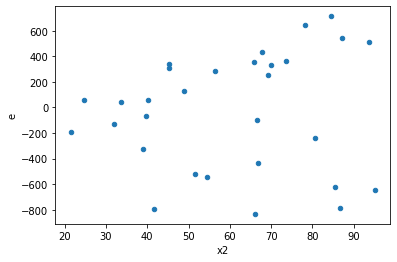

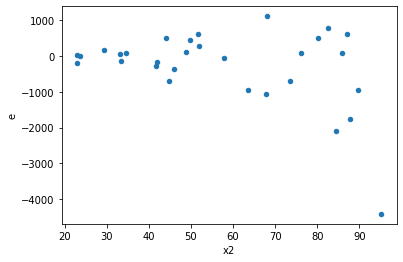

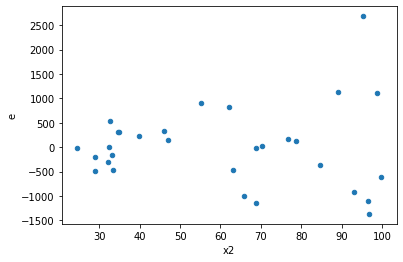

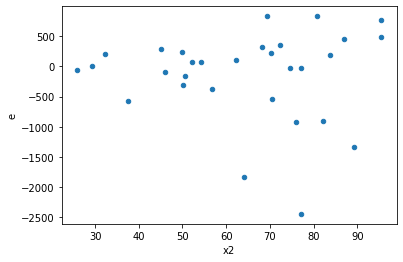

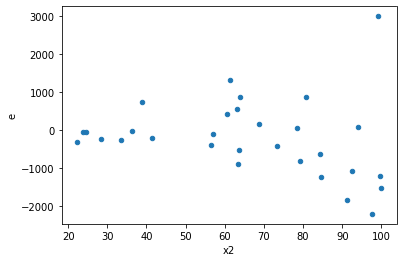

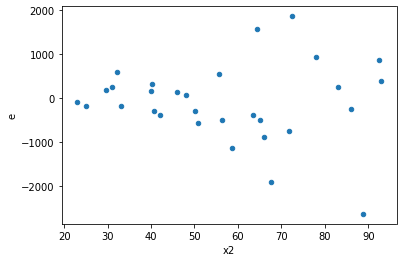

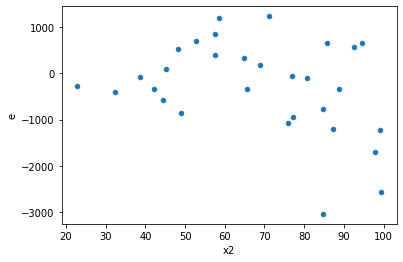

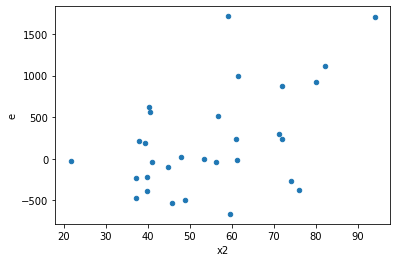

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,17.0,9.0,1223314.6899401443,4485494.743504547,71959.6876435379,498388.3048338385,6.925937579143934,0.00565882308633503,0.9971705884568325,0.002829411543167515,Reject001=0 : Heteroscedasticity
1.0,17.0,9.0,1777103.0181224798,8886499.346116392,104535.47165426351,987388.8162351546,9.445490612993122,0.0017117928632124357,0.9991441035683938,0.0008558964316062179,Reject001=0 : Heteroscedasticity
2.0,10.0,16.0,1128192.7061574839,4299741.230082513,112819.27061574839,268733.82688015705,2.3819851468056257,0.11769305193714974,0.9411534740314251,0.05884652596857487,Reject001=1 : Homoscedasticity
3.0,10.0,16.0,1760223.6592719671,17898713.928236067,176022.36592719672,1118669.6205147542,6.355269767124018,0.0012099756318375565,0.9993950121840812,0.0006049878159187783,Reject001=0 : Heteroscedasticity
5.0,13.0,13.0,4472879.811751608,9817774.970648725,344067.6778270468,755213.4592806711,2.194956132032535,0.169645522790697,0.9151772386046515,0.0848227613953485,Reject001=1 : Homoscedasticity
9.0,9.0,17.0,1154279.4461973617,4296789.9893218735,128253.27179970685,252752.35231305138,1.9707283000762332,0.21834377354645707,0.8908281132267715,0.10917188677322853,Reject001=1 : Homoscedasticity
10.0,12.0,14.0,1836204.7344736187,26357240.644100137,153017.06120613488,1882660.0460071526,12.303595632848761,3.909193081463869e-05,0.9999804540345927,1.9545965407319343e-05,Reject001=0 : Heteroscedasticity
12.0,9.0,17.0,1721398.9620394649,10720203.498707429,191266.55133771832,630600.2058063194,3.296970648531598,0.03285208644072424,0.9835739567796379,0.01642604322036212,Reject001=1 : Homoscedasticity
14.0,17.0,9.0,1313855.5365928167,6230418.952390425,77285.61979957746,692268.772487825,8.957277877606021,0.0021085815097163785,0.9989457092451418,0.0010542907548581892,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,17.0,9.0,1223314.6899401443,4485494.743504547,71959.6876435379,498388.3048338385,6.925937579143934,0.00565882308633503,Reject001=0 : Heteroscedasticity
1.0,17.0,9.0,1777103.0181224798,8886499.346116392,104535.47165426351,987388.8162351546,9.445490612993122,0.0017117928632124357,Reject001=0 : Heteroscedasticity
2.0,10.0,16.0,1128192.7061574839,4299741.230082513,112819.27061574839,268733.82688015705,2.3819851468056257,0.11769305193714974,Reject001=1 : Homoscedasticity
3.0,10.0,16.0,1760223.6592719671,17898713.928236067,176022.36592719672,1118669.6205147542,6.355269767124018,0.0012099756318375565,Reject001=0 : Heteroscedasticity
4.0,14.0,12.0,17885882.5091042,1366597.9199974062,1277563.0363645856,113883.15999978385,0.08914093219528961,6.790721233861806e-05,Reject001=0 : Heteroscedasticity
5.0,13.0,13.0,4472879.811751608,9817774.970648725,344067.6778270468,755213.4592806711,2.194956132032535,0.169645522790697,Reject001=1 : Homoscedasticity
6.0,13.0,13.0,20007230.412822343,4020846.6140562533,1539017.7240632572,309295.8933889426,0.20096967601669402,0.006792578222954915,Reject001=0 : Heteroscedasticity
7.0,9.0,17.0,8974334.827303581,9864276.550432619,997148.3141448423,580251.5617901541,0.5819109891268078,0.41157764123509355,Reject001=1 : Homoscedasticity
8.0,10.0,16.0,8669518.957922878,12545050.25621675,866951.8957922878,784065.6410135468,0.9043934788296494,0.8982867514513064,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      529
Reject001=0 : Heteroscedasticity    471
Name: Result_test, dtype: int64